In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# splitting and normalizing the training, validation and test sets
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [4]:
# reshaping the input data to 28,28,1
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_valid.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

#### First configuration of 16, 32 and 64 kernels/filters.

In [5]:
# fixing the random numbers generator
np.random.seed(42)
tf.random.set_seed(42)

# creating a sequantial model of an input, three convolutional hidden and an output layer
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8394 - loss: 0.5105 - val_accuracy: 0.9812 - val_loss: 0.0695
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9783 - loss: 0.0717 - val_accuracy: 0.9851 - val_loss: 0.0542
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9853 - val_loss: 0.0544
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9896 - loss: 0.0337 - val_accuracy: 0.9834 - val_loss: 0.0595
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9796 - val_loss: 0.0701
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9926 - loss: 0.0206 - val_accuracy: 0.9864 - val_loss: 0.0524
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9939 - loss: 0.0172 - val_accuracy: 0.9879 - val_loss: 0.0499
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9943 - loss: 0.0148 - val_accu

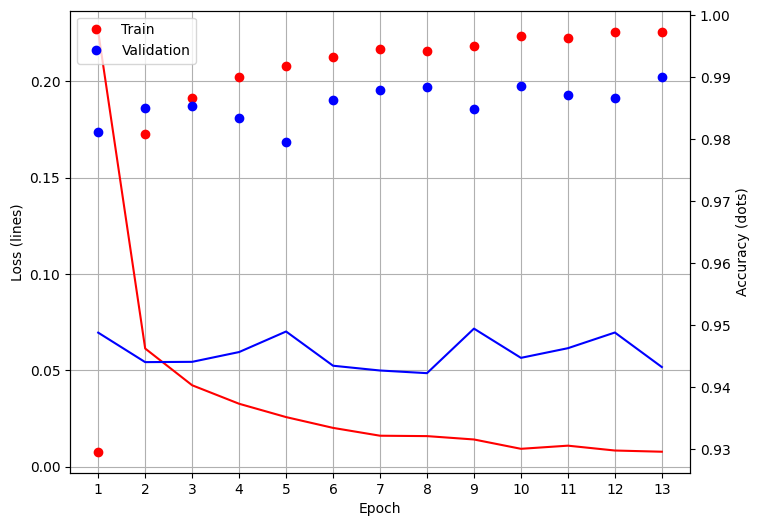

In [9]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0489

The accuracy on the test set is: 99.1%


#### Second configuration of 32, 64 and 128 kernels/filters.

In [11]:
# fix the random numbers generator
np.random.seed(42)
tf.random.set_seed(42)

# create a sequantial model of an input, three convolutional hidden and an output layer
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8782 - loss: 0.3973 - val_accuracy: 0.9798 - val_loss: 0.0666
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9822 - loss: 0.0574 - val_accuracy: 0.9863 - val_loss: 0.0484
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9881 - loss: 0.0355 - val_accuracy: 0.9862 - val_loss: 0.0516
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9832 - val_loss: 0.0616
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9929 - loss: 0.0202 - val_accuracy: 0.9865 - val_loss: 0.0473
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9878 - val_loss: 0.0425
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9876 - val_loss: 0.0510
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9960 - loss: 0.0121 

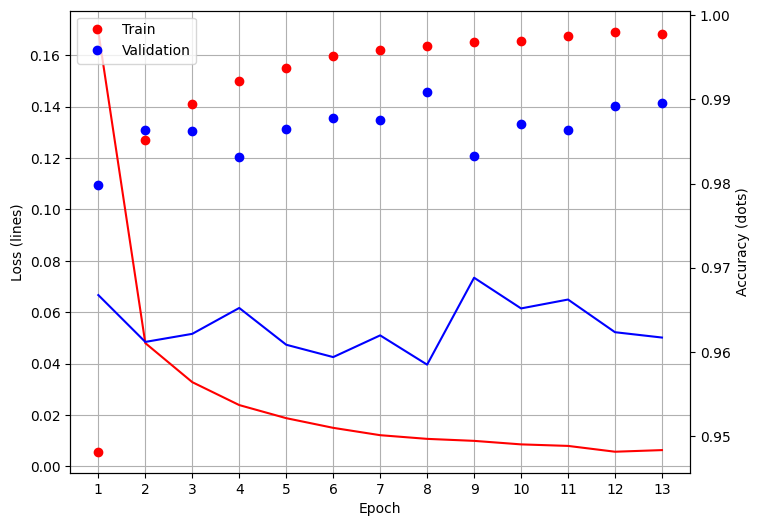

In [15]:
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0443

The accuracy on the test set is: 99.3%


##### By doubling the number of kernels in each layer, we observe a negligible increase in accuracy on the test set, which comes at the expense of a significant increase in computational cost and introduces instability to the training process.